## Descriptive Statistics

In [1]:
import math
import statistics
import numpy as np
import scipy.stats
import pandas as pd

In [2]:
x = [8, 1, 2.5, 4, 28]
x_with_nan = [8, 1, 2.5, math.nan, 4, 28]
print(x)
print(x_with_nan)

[8, 1, 2.5, 4, 28]
[8, 1, 2.5, nan, 4, 28]


In [3]:
y, y_with_nan = np.array(x), np.array(x_with_nan)
z, z_with_nan = pd.Series(x), pd.Series(x_with_nan)
print(y)
print(y_with_nan)
print(z_with_nan)

[ 8.   1.   2.5  4.  28. ]
[ 8.   1.   2.5  nan  4.  28. ]
0     8.0
1     1.0
2     2.5
3     NaN
4     4.0
5    28.0
dtype: float64


## Mean

In [4]:
mean_ = sum(x) / len(x)
mean_

8.7

In [5]:
mean_ = statistics.mean(x)
print(mean_)

8.7


In [6]:
mean_ = statistics.mean(x_with_nan)
print(mean_)

nan


In [7]:
# menggunakan numpy

mean_ = np.mean(y)
mean_

8.7

In [8]:
print(np.mean(y_with_nan))
print(y_with_nan.mean())

nan
nan


In [9]:
np.nanmean(y_with_nan)

8.7

## Weight Mean

In [10]:

x = [8, 1, 2.5, 4, 28]
w = [0.1, 0.2, 0.3, 0.25, 0.15]

wmean = sum(w[i] * x[i] for i in range(len(x))) / sum(w)
print(wmean)

wmean = sum(x_ * w_ for (x_, w_) in zip(x, w)) / sum(w)
print(wmean)

6.95
6.95


In [11]:
#jika memiliki kumpulan data yg besar, gunakan numpy

y,z,w = np.array(x), pd.Series(x), np.array(w)

wmean = np.average(y, weights=w)
print(wmean)

wmean = np.average(z, weights=w)
print(wmean)

6.95
6.95


In [12]:
#dg element wise

(w*y).sum() / w.sum()

6.95

## Harmonic Mean

In [13]:
hmean = len(x) / sum(1 / item for item in x)
hmean

2.7613412228796843

In [14]:
hmean = statistics.harmonic_mean(x)
hmean

2.7613412228796843

In [15]:
scipy.stats.hmean(y)

2.7613412228796843

In [16]:
scipy.stats.hmean(z)

2.7613412228796843

## Geometric Mean

In [17]:
gmean = 1

for item in x:
    gmean *= item

gmean **= 1 / len(x)
gmean

4.677885674856041

In [18]:
scipy.stats.gmean(y)
scipy.stats.gmean(z)

4.67788567485604

## Median

In [19]:
n = len(x)
if n % 2:
    median_ = sorted(x)[round(0.5*(n-1))]
else:
    x_ord, index=sorted(x), roundd(0.5 * n)
    median_ = 0.5 * (x_ord[index-1] + x_ord[index])
                           
median_

4

In [20]:
x

[8, 1, 2.5, 4, 28]

In [21]:
statistics.median_low(x[:-1])

2.5

In [22]:
statistics.median_high(x[:-1])

4

In [23]:
print(statistics.median(x_with_nan))
print(statistics.median_low(x_with_nan))
print(statistics.median_high(x_with_nan))

6.0
4
8


In [24]:
median_ = np.median(y)
print(median_)

4.0


In [25]:
median_ = np.median(y[:-1])
print(median_)

3.25


## Mode

In [26]:
u = [2, 3, 2, 8, 12]
v = [12, 15, 12, 15, 21, 15, 12]

mode_ = max((u.count(item), item) for item in set(u))[1]
mode_

2

In [27]:
mode_ = statistics.mode(u)
mode_

2

In [28]:
u, v = np.array(u), np.array(v)

mode_ = scipy.stats.mode(u)
mode_

ModeResult(mode=array([2]), count=array([2]))

In [29]:
mode_ = scipy.stats.mode(v)
mode_

ModeResult(mode=array([12]), count=array([3]))

In [30]:
#kita dpt mendapatkan mode & jml kemunculannya sbg array numpy dg dot notation

print(mode_.mode)
print(mode_.count)

[12]
[3]


In [31]:
#dg pandas dpt menangani nilai multimodal dg baik & mengabaikan nilai nan scr default

u,v,w = pd.Series(u), pd.Series(v), pd.Series([2, 2, math.nan])
print(u.mode())
print(v.mode())
print(w.mode())

0    2
dtype: int32
0    12
1    15
dtype: int32
0    2.0
dtype: float64


## Variance

In [32]:
n = len(x)

mean_ = sum(x) / n

var_ = sum((item - mean_)**2 for item in x) / (n-1)
var_

123.19999999999999

In [33]:
var_ = statistics.variance(x)
var_

123.2

In [34]:
var_ = np.var(y, ddof=1)
var_

123.19999999999999

In [35]:
z.var(ddof=1)

123.19999999999999

## Standard Deviation

In [36]:
std_ = var_**0.5
std_

11.099549540409285

In [37]:
std_ = statistics.stdev(x)
std_

11.099549540409287

In [38]:
np.std(y, ddof=1)    #cra 1, hsl ttp sm

y.std(ddof=1)    #cra 2, hsl ttp sm

11.099549540409285

In [39]:
z.std(ddof=1)

11.099549540409285

## Skewness

In [40]:
x = [8, 1, 2.5, 4, 28]

n = len(x)

mean_ = sum(x)/n
var_ = sum((item - mean_)**2 for item in x) / (n-1)
std_ = var_**0.5

skew_ = (sum((item - mean_)**3 for item in x) * n / ((n-1)*(n-2)*std_**3))
skew_

1.9470432273905929

In [41]:
y, y_with_nan = np.array(x), np.array(x_with_nan)

scipy.stats.skew(y, bias=False)

1.9470432273905927

In [42]:
scipy.stats.skew(y_with_nan, bias=False)

nan

In [43]:
z, z_with_nan = pd.Series(x), pd.Series(x_with_nan)

z.skew()

1.9470432273905924

In [44]:
z_with_nan.skew()

1.9470432273905924

## Skewness

In [45]:
x = [8, 1, 2.5, 4, 28]

n = len(x)

mean_ = sum(x)/n
var_ = sum((item - mean_)**2 for item in x) / (n-1)
std_ = var_**0.5

skew_ = (sum((item - mean_)**3 for item in x) * n / ((n-1)*(n-2)*std_**3))
skew_

1.9470432273905929

In [46]:
y, y_with_nan = np.array(x), np.array(x_with_nan)

scipy.stats.skew(y, bias=False)

scipy.stats.skew(y_with_nan, bias=False)

nan

In [47]:
z, z_with_nan = pd.Series(x), pd.Series(x_with_nan)

z.skew()

z_with_nan.skew()

1.9470432273905924

## Percentiles

In [48]:
x = [-5, -1.1, 0.1, 2, 8, 12.8, 21, 25.8, 41]
statistics.quantiles(x, n=2)   #median

statistics.quantiles(x, n=4, method='inclusive')   #presentil ke-25 dan ke-75

#cari presentil ke-5 dan ke-95

y=np.array(x)
np.percentile(y, 5)

-3.44

In [49]:
np.percentile(y, 95)

34.919999999999995

In [50]:
np.percentile(y, [25, 50, 75])

np.median(y)

8.0

In [51]:
y_with_nan = np.insert(y, 2, np.nan)
y_with_nan

array([-5. , -1.1,  nan,  0.1,  2. ,  8. , 12.8, 21. , 25.8, 41. ])

In [52]:
np.nanpercentile(y_with_nan, [25, 50, 75])

array([ 0.1,  8. , 21. ])

In [53]:
#dengan pd.series objek

z, z_with_nan = pd.Series(y), pd.Series(y_with_nan)
z.quantile(0.05)

-3.44

In [54]:
z.quantile(0.95)

34.919999999999995

In [55]:
z.quantile([0.25, 0.5, 0.75])

0.25     0.1
0.50     8.0
0.75    21.0
dtype: float64

In [56]:
z_with_nan.quantile([0.25, 0.5, 0.75])

0.25     0.1
0.50     8.0
0.75    21.0
dtype: float64

## Rangers

In [57]:
np.ptp(y)

46.0

In [58]:
np.ptp(z)

46.0

In [59]:
np.ptp(y_with_nan)

nan

In [60]:
np.ptp(z_with_nan)

nan

In [61]:
np.amax(y) - np.amin(y)

46.0

In [62]:
np.nanmax(y_with_nan)-np.nanmin(y_with_nan)

46.0

In [63]:
# interquartile range

quartiles = np.quantile(y, [0.25, 0.75])
quartiles[1] - quartiles[0]

20.9

In [64]:
quartiles = z.quantile([0.25, 0.75])
quartiles[0.75] - quartiles[0.25]

20.9

## Summary of Descriptive Statistics

In [65]:
result = scipy.stats.describe(y, ddof=1, bias=False)
result

DescribeResult(nobs=9, minmax=(-5.0, 41.0), mean=11.622222222222222, variance=228.75194444444446, skewness=0.9249043136685094, kurtosis=0.14770623629658886)

In [66]:
result.nobs

9

In [67]:
result.minmax[0]   #min

-5.0

In [68]:
result.minmax[1]  #max

41.0

In [69]:
result.mean

11.622222222222222

In [70]:
result.variance

228.75194444444446

In [71]:
result.skewness

0.9249043136685094

In [72]:
result.kurtosis

0.14770623629658886

In [73]:
#objek series pandas 

result = z.describe()
result

count     9.000000
mean     11.622222
std      15.124548
min      -5.000000
25%       0.100000
50%       8.000000
75%      21.000000
max      41.000000
dtype: float64

## Covariance

In [74]:
x = list(range(-10, 11))
y = [0, 2, 2, 2, 2, 3, 3, 6, 7, 4, 7, 6, 6, 9, 4, 5, 5, 10, 11, 12, 14]
x_, y_ = np.array(x), np.array(y)
x__, y__ = pd.Series(x_), pd.Series(y_)

In [75]:
n = len(x)
mean_x, mean_y = sum(x) / n, sum(y) / n
cov_xy = (sum((x[k] - mean_x) * (y[k] - mean_y) for k in range(n)) / (n-1))
cov_xy

19.95

In [76]:
#covarian matrix

cov_matrix = np.cov(x_, y_)
cov_matrix

array([[38.5       , 19.95      ],
       [19.95      , 13.91428571]])

In [77]:
#cek elemen matrix

x_.var(ddof=1)

38.5

In [78]:
y_.var(ddof=1)

13.914285714285711

In [79]:

cov_xy = cov_matrix[0, 1]
cov_xy


19.95

In [80]:
cov_xy = cov_matrix[1, 0]
cov_xy

19.95

In [81]:
#dg series pandas

cov_xy = x__.cov(y__)
cov_xy

19.95

In [82]:
cov_xy = y__.cov(x__)
cov_xy

19.95

r > 0 (kolerasi positif)
r < 0 (korelasi negatif)
r = 1 (hub linier positif yg sempurna antara variabel)
r = -1 (hub linier negatif yg sempurna antara variabel)
r = 0 (korelasi antar variabel itu lemah)


In [83]:
var_x = sum((item - mean_x)**2 for item in x) / (n - 1)
var_y = sum((item - mean_y)**2 for item in y) / (n - 1)
std_x, std_y = var_x ** 0.5, var_y ** 0.5
r = cov_xy / (std_x * std_y)
r

0.861950005631606

In [84]:
#cari korelasi matriks koefisien 

corr_matrix = np.corrcoef(x_, y_)
corr_matrix

array([[1.        , 0.86195001],
       [0.86195001, 1.        ]])

In [85]:
#cari baris ke-1 kolom ke-2
r = corr_matrix[0, 1]
r

0.8619500056316061

In [86]:
#dg scipy stats linregressi

scipy.stats.linregress(x_, y_)

LinregressResult(slope=0.5181818181818181, intercept=5.714285714285714, rvalue=0.861950005631606, pvalue=5.122760847201164e-07, stderr=0.06992387660074979, intercept_stderr=0.4234100995002589)

In [87]:
result = scipy.stats.linregress(x_, y_)
r = result.rvalue
r

0.861950005631606

In [88]:
#dg series pandas

r = x__.corr(y__)
r

0.8619500056316061

In [89]:
r = y__.corr(x__)
r

0.861950005631606

## Working with 2D

In [90]:
#axes

a = np.array([[1, 1, 1],
             [2, 3, 1],
             [4, 9, 2],
             [8, 27, 4],
             [16, 1, 1]])
a


array([[ 1,  1,  1],
       [ 2,  3,  1],
       [ 4,  9,  2],
       [ 8, 27,  4],
       [16,  1,  1]])

In [91]:
np.mean(a)

5.4

In [92]:
a.mean()

5.4

In [93]:
np.median(a)

2.0

In [94]:
a.var(ddof=1)

53.40000000000001

In [95]:
np.mean(a, axis=0)

array([6.2, 8.2, 1.8])

In [96]:
a.mean(axis=0)

array([6.2, 8.2, 1.8])

In [97]:
np.mean(a, axis=1)

array([ 1.,  2.,  5., 13.,  6.])

In [98]:
a.mean(axis=1)

array([ 1.,  2.,  5., 13.,  6.])

In [99]:
np.median(a, axis=0)

array([4., 3., 1.])

In [100]:
np.median(a, axis=1)

array([1., 2., 4., 8., 1.])

In [101]:
a.var(axis=0, ddof=1)

array([ 37.2, 121.2,   1.7])

In [102]:
a.var(axis=1, ddof=1)

array([  0.,   1.,  13., 151.,  75.])

In [103]:
scipy.stats.gmean(a)

array([4.        , 3.73719282, 1.51571657])

In [104]:
scipy.stats.gmean(a, axis=0)

array([4.        , 3.73719282, 1.51571657])

In [105]:
scipy.stats.gmean(a, axis=1)

array([1.        , 1.81712059, 4.16016765, 9.52440631, 2.5198421 ])

In [106]:
#geometri mean dr semua item dlm array a

scipy.stats.gmean(a, axis=None)

2.829705017016332

In [107]:
#summary statistik utk data 2D

scipy.stats.describe(a, axis=None, ddof=1, bias=False)

DescribeResult(nobs=15, minmax=(1, 27), mean=5.4, variance=53.40000000000001, skewness=2.264965290423389, kurtosis=5.212690982795767)

In [108]:
scipy.stats.describe(a, ddof=1, bias=False)

DescribeResult(nobs=5, minmax=(array([1, 1, 1]), array([16, 27,  4])), mean=array([6.2, 8.2, 1.8]), variance=array([ 37.2, 121.2,   1.7]), skewness=array([1.32531471, 1.79809454, 1.71439233]), kurtosis=array([1.30376344, 3.14969121, 2.66435986]))

In [109]:
scipy.stats.describe(a, axis=1, ddof=1, bias=False)

DescribeResult(nobs=3, minmax=(array([1, 1, 2, 4, 1]), array([ 1,  3,  9, 27, 16])), mean=array([ 1.,  2.,  5., 13.,  6.]), variance=array([  0.,   1.,  13., 151.,  75.]), skewness=array([0.        , 0.        , 1.15206964, 1.52787436, 1.73205081]), kurtosis=array([-3. , -1.5, -1.5, -1.5, -1.5]))

In [110]:
#kita bisa mendapatkan nilai tertentu dan ringkasan dg dot notation

result = scipy.stats.describe(a, axis=1, ddof=1, bias=False)
result.mean

array([ 1.,  2.,  5., 13.,  6.])

## DataFrames

In [111]:
row_names = ['first', 'second', 'thrid', 'fourth', 'fifth']
col_names = ['A', 'B', 'C']
df = pd.DataFrame(a, index=row_names, columns=col_names)
df

,A,B,C
first,1,1,1
second,2,3,1
thrid,4,9,2
fourth,8,27,4
fifth,16,1,1


In [112]:
df.mean()

A    6.2
B    8.2
C    1.8
dtype: float64

In [113]:
df.var()

A     37.2
B    121.2
C      1.7
dtype: float64

In [114]:
df.mean(axis=1)

first      1.0
second     2.0
thrid      5.0
fourth    13.0
fifth      6.0
dtype: float64

In [115]:
df.var(axis=1)

first       0.0
second      1.0
thrid      13.0
fourth    151.0
fifth      75.0
dtype: float64

In [116]:
#mengisolasi setiap kolom dataframe 

df['A']

first      1
second     2
thrid      4
fourth     8
fifth     16
Name: A, dtype: int32

In [117]:
df['A'].mean()

6.2

In [118]:
df['A'].var()

37.20000000000001

In [119]:
df.values

array([[ 1,  1,  1],
       [ 2,  3,  1],
       [ 4,  9,  2],
       [ 8, 27,  4],
       [16,  1,  1]])

In [120]:
df.to_numpy()

array([[ 1,  1,  1],
       [ 2,  3,  1],
       [ 4,  9,  2],
       [ 8, 27,  4],
       [16,  1,  1]])

In [121]:
df.describe()

,A,B,C
count,5.00000,5.000000,5.00000
mean,6.20000,8.200000,1.80000
std,6.09918,11.009087,1.30384
min,1.00000,1.000000,1.00000
25%,2.00000,1.000000,1.00000
50%,4.00000,3.000000,1.00000
75%,8.00000,9.000000,2.00000
max,16.00000,27.000000,4.00000


In [122]:

#kita dpt mengakses setiap item summary spt ini

df.describe().at['mean', 'A']

6.2

## Vizualizing Data

In [127]:
import matplotlib.pyplot as plt

In [128]:
plt.style.use('ggplot')

## Box Plot

In [129]:
np.random.seed(seed=0)
x = np.random.randn(1000)
y = np.random.randn(100)
z = np.random.randn(10)

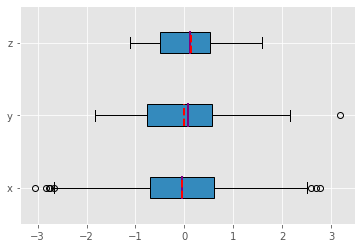

In [132]:
fig, ax = plt.subplots()
ax.boxplot((x, y, z), vert=False, showmeans=True, meanline=True, 
labels=('x', 'y', 'z'), patch_artist=True, medianprops={'linewidth': 2, 'color':'purple'},meanprops={'linewidth':2, 'color':'red'})
plt.show()

## Histogram

In [133]:
hist, bin_edges = np.histogram(x, bins=10)
hist

array([  9,  20,  70, 146, 217, 239, 160,  86,  38,  15], dtype=int64)

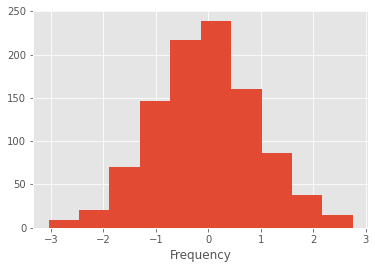

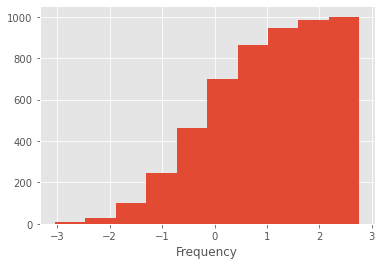

In [134]:
bin_edges

fig, ax = plt.subplots()
ax.hist(x, bin_edges, cumulative=False)
ax.set_xlabel('x')
ax.set_xlabel('Frequency')
plt.show()

fig, ax = plt.subplots()
ax.hist(x, bin_edges, cumulative=True)
ax.set_xlabel('x')
ax.set_xlabel('Frequency')
plt.show()

## Pie chart

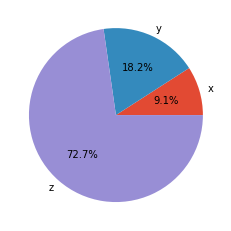

In [135]:
x,y,z = 128, 256, 1024

fig, ax = plt.subplots()
ax.pie((x,y,z), labels=('x','y','z'), autopct='%1.1f%%')
plt.show()

## Bar Chart

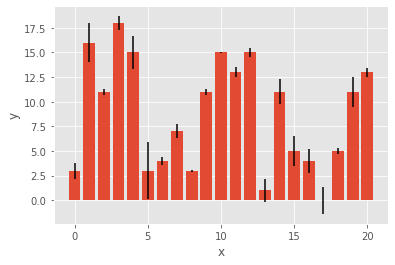

In [136]:
x = np.arange(21)
y = np.random.randint(21, size=21)
err = np.random.randn(21)

fig, ax = plt.subplots()
ax.bar(x,y,yerr=err)
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.show()

## X-Y plots

In [140]:
x = np.arange(21)
y = 5+2*x+2*np.random.randn(21)
slope, intercept, r, *__ = scipy.stats.linregress(x,y)
line = f'Regression line: y = {intercept:.2f}+{slope:.2f}x, r={r:.2f}'

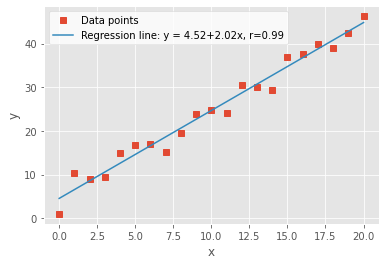

In [141]:
fig, ax = plt.subplots()
ax.plot(x, y, linewidth=0, marker='s', label='Data points')
ax.plot(x, intercept + slope * x, label=line)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend(facecolor='white')
plt.show()